In [1]:
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

# Problem Statement

# Data Gathering

In [2]:
df = pd.read_csv("autos_dataset.csv")
df

symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
200         four        sedan          rwd           front       109.1  ...   
201         four        sedan          rwd           front       109.1  ...   
202         four        sedan          rwd           front       109.1  ...   
203         four        sedan          rwd           front       109.1  ...   
204         four        sedan          rwd           front       109.1  ...   

     engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0            130         mpfi  3.47    2.68               9.0        111   
1            130         mpfi  3.47    2.68               9.0        111   
2            152         mpfi  2.68    3.47               9.0        154   
3            109         mpfi  3.19     3.4              10.0        102   
4            136         mpfi  3.19     3.4               8.0        115   
..           ...          ...   ...     ...               ...        ...   
200          141         mpfi  3.78    3.15               9.5        114   
201          141         mpfi  3.78    3.15               8.7        160   
202          173         mpfi  3.58    2.87               8.8        134   
203          145          idi  3.01     3.4              23.0        106   
204          141         mpfi  3.78    3.15               9.5        114   

     peak-rpm city-mpg highway-mpg  price  
0        5000       21          27  13495  
1        5000       21          27  16500  
2        5000       19          26  16500  
3        5500       24          30  13950  
4        5500       18          22  17450  
..        ...      ...         ...    ...  
200      5400       23          28  16845  
201      5300       19          25  19045  
202      5500       18          23  21485  
203      4800       26          27  22470  
204      5400       19          25  22625  

[205 rows x 26 columns]

# Exploratory data analysis(EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### 1. symboling

In [5]:
df['symboling']

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64

In [6]:
df['symboling'].nunique()

6

In [7]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

### 2. normalized-losses

In [8]:
df['normalized-losses']

0        ?
1        ?
2        ?
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: object

In [9]:
df['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [10]:
df.replace({'?':np.nan},inplace=True)

In [11]:
df['normalized-losses'].value_counts()

161    11
91      8
150     7
128     6
134     6
104     6
95      5
102     5
103     5
74      5
85      5
168     5
94      5
65      5
106     4
122     4
148     4
118     4
93      4
101     3
125     3
137     3
154     3
83      3
115     3
119     2
87      2
194     2
197     2
108     2
89      2
164     2
158     2
145     2
192     2
188     2
81      2
110     2
113     2
129     2
153     2
107     1
78      1
186     1
231     1
77      1
98      1
121     1
90      1
142     1
256     1
Name: normalized-losses, dtype: int64

In [12]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [13]:
df['normalized-losses'] = df['normalized-losses'].astype(float)

In [14]:
df['normalized-losses'].mean()

122.0

In [15]:
df['normalized-losses'].median()

115.0

In [16]:
df['normalized-losses'].fillna(df['normalized-losses'].median(),inplace=True)

In [17]:
df['normalized-losses'].isna().sum()

0

In [18]:
df['normalized-losses'] = df['normalized-losses'].astype(int)

### 3. make

In [19]:
df['make']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: make, Length: 205, dtype: object

In [20]:
df['make'].nunique()

22

In [21]:
df['make'].value_counts().to_dict()

{'toyota': 32,
 'nissan': 18,
 'mazda': 17,
 'mitsubishi': 13,
 'honda': 13,
 'volkswagen': 12,
 'subaru': 12,
 'peugot': 11,
 'volvo': 11,
 'dodge': 9,
 'mercedes-benz': 8,
 'bmw': 8,
 'audi': 7,
 'plymouth': 7,
 'saab': 6,
 'porsche': 5,
 'isuzu': 4,
 'jaguar': 3,
 'chevrolet': 3,
 'alfa-romero': 3,
 'renault': 2,
 'mercury': 1}

Encoding Techniques
1. Label Encoding  --> used for ordinal data
2. Onehot Encoding  --> used for nominal data

In [22]:
df = pd.get_dummies(df,columns=['make'])
df

symboling  normalized-losses fuel-type aspiration num-of-doors  \
0            3                115       gas        std          two   
1            3                115       gas        std          two   
2            1                115       gas        std          two   
3            2                164       gas        std         four   
4            2                164       gas        std         four   
..         ...                ...       ...        ...          ...   
200         -1                 95       gas        std         four   
201         -1                 95       gas      turbo         four   
202         -1                 95       gas        std         four   
203         -1                 95    diesel      turbo         four   
204         -1                 95       gas      turbo         four   

      body-style drive-wheels engine-location  wheel-base  length  ...  \
0    convertible          rwd           front        88.6   168.8  ...   
1    convertible          rwd           front        88.6   168.8  ...   
2      hatchback          rwd           front        94.5   171.2  ...   
3          sedan          fwd           front        99.8   176.6  ...   
4          sedan          4wd           front        99.4   176.6  ...   
..           ...          ...             ...         ...     ...  ...   
200        sedan          rwd           front       109.1   188.8  ...   
201        sedan          rwd           front       109.1   188.8  ...   
202        sedan          rwd           front       109.1   188.8  ...   
203        sedan          rwd           front       109.1   188.8  ...   
204        sedan          rwd           front       109.1   188.8  ...   

     make_nissan  make_peugot  make_plymouth make_porsche make_renault  \
0              0            0              0            0            0   
1              0            0              0            0            0   
2              0            0              0            0            0   
3              0            0              0            0            0   
4              0            0              0            0            0   
..           ...          ...            ...          ...          ...   
200            0            0              0            0            0   
201            0            0              0            0            0   
202            0            0              0            0            0   
203            0            0              0            0            0   
204            0            0              0            0            0   

     make_saab make_subaru make_toyota make_volkswagen  make_volvo  
0            0           0           0               0           0  
1            0           0           0               0           0  
2            0           0           0               0           0  
3            0           0           0               0           0  
4            0           0           0               0           0  
..         ...         ...         ...             ...         ...  
200          0           0           0               0           1  
201          0           0           0               0           1  
202          0           0           0               0           1  
203          0           0           0               0           1  
204          0           0           0               0           1  

[205 rows x 47 columns]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   symboling           205 non-null    int64  
 1   normalized-losses   205 non-null    int32  
 2   fuel-type           205 non-null    object 
 3   aspiration          205 non-null    object 
 4   num-of-doors        203 non-null    object 
 5   body-style          205 non-null    object 
 6   drive-wheels        205 non-null    object 
 7   engine-location     205 non-null    object 
 8   wheel-base          205 non-null    float64
 9   length              205 non-null    float64
 10  width               205 non-null    float64
 11  height              205 non-null    float64
 12  curb-weight         205 non-null    int64  
 13  engine-type         205 non-null    object 
 14  num-of-cylinders    205 non-null    object 
 15  engine-size         205 non-null    int64  
 16  fuel-sys

### 4. fuel-type

In [24]:
df['fuel-type']

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fuel-type, Length: 205, dtype: object

In [25]:
df['fuel-type'].isna().sum()

0

In [26]:
df['fuel-type'].value_counts().to_dict()

{'gas': 185, 'diesel': 20}

In [27]:
label_encoder = preprocessing.LabelEncoder()
df['fuel-type'] = label_encoder.fit_transform(df['fuel-type'])

In [28]:
df['fuel-type'].value_counts()

1    185
0     20
Name: fuel-type, dtype: int64

In [29]:
fuel_type_value = {'gas': 1, 'diesel': 0}
fuel_type_value

{'gas': 1, 'diesel': 0}

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   symboling           205 non-null    int64  
 1   normalized-losses   205 non-null    int32  
 2   fuel-type           205 non-null    int32  
 3   aspiration          205 non-null    object 
 4   num-of-doors        203 non-null    object 
 5   body-style          205 non-null    object 
 6   drive-wheels        205 non-null    object 
 7   engine-location     205 non-null    object 
 8   wheel-base          205 non-null    float64
 9   length              205 non-null    float64
 10  width               205 non-null    float64
 11  height              205 non-null    float64
 12  curb-weight         205 non-null    int64  
 13  engine-type         205 non-null    object 
 14  num-of-cylinders    205 non-null    object 
 15  engine-size         205 non-null    int64  
 16  fuel-sys

### 5. aspiration

In [31]:
df['aspiration']

0        std
1        std
2        std
3        std
4        std
       ...  
200      std
201    turbo
202      std
203    turbo
204    turbo
Name: aspiration, Length: 205, dtype: object

In [32]:
df['aspiration'].isnull().sum()

0

In [33]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [34]:
df['aspiration'] = label_encoder.fit_transform(df['aspiration'])

In [35]:
df['aspiration'].value_counts()

0    168
1     37
Name: aspiration, dtype: int64

In [36]:
aspiration_value = {'std': 0, 'turbo': 1}
aspiration_value

{'std': 0, 'turbo': 1}

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   symboling           205 non-null    int64  
 1   normalized-losses   205 non-null    int32  
 2   fuel-type           205 non-null    int32  
 3   aspiration          205 non-null    int32  
 4   num-of-doors        203 non-null    object 
 5   body-style          205 non-null    object 
 6   drive-wheels        205 non-null    object 
 7   engine-location     205 non-null    object 
 8   wheel-base          205 non-null    float64
 9   length              205 non-null    float64
 10  width               205 non-null    float64
 11  height              205 non-null    float64
 12  curb-weight         205 non-null    int64  
 13  engine-type         205 non-null    object 
 14  num-of-cylinders    205 non-null    object 
 15  engine-size         205 non-null    int64  
 16  fuel-sys

### 6. num-of-doors

In [38]:
df['num-of-doors']

0       two
1       two
2       two
3      four
4      four
       ... 
200    four
201    four
202    four
203    four
204    four
Name: num-of-doors, Length: 205, dtype: object

In [39]:
df['num-of-doors'].isna().sum()

2

In [40]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [41]:
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)

In [42]:
df['num-of-doors'].value_counts()

four    116
two      89
Name: num-of-doors, dtype: int64

In [43]:
df['num-of-doors'] = label_encoder.fit_transform(df['num-of-doors'])

In [44]:
df['num-of-doors'].value_counts()

0    116
1     89
Name: num-of-doors, dtype: int64

In [45]:

num_doors_value = {'four': 0, 'two': 1}
num_doors_value

{'four': 0, 'two': 1}

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   symboling           205 non-null    int64  
 1   normalized-losses   205 non-null    int32  
 2   fuel-type           205 non-null    int32  
 3   aspiration          205 non-null    int32  
 4   num-of-doors        205 non-null    int32  
 5   body-style          205 non-null    object 
 6   drive-wheels        205 non-null    object 
 7   engine-location     205 non-null    object 
 8   wheel-base          205 non-null    float64
 9   length              205 non-null    float64
 10  width               205 non-null    float64
 11  height              205 non-null    float64
 12  curb-weight         205 non-null    int64  
 13  engine-type         205 non-null    object 
 14  num-of-cylinders    205 non-null    object 
 15  engine-size         205 non-null    int64  
 16  fuel-sys

### 7. body-style

In [47]:
df['body-style']

0      convertible
1      convertible
2        hatchback
3            sedan
4            sedan
          ...     
200          sedan
201          sedan
202          sedan
203          sedan
204          sedan
Name: body-style, Length: 205, dtype: object

In [48]:
df['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [49]:
df = pd.get_dummies(df, columns=['body-style'])
df

symboling  normalized-losses  fuel-type  aspiration  num-of-doors  \
0            3                115          1           0             1   
1            3                115          1           0             1   
2            1                115          1           0             1   
3            2                164          1           0             0   
4            2                164          1           0             0   
..         ...                ...        ...         ...           ...   
200         -1                 95          1           0             0   
201         -1                 95          1           1             0   
202         -1                 95          1           0             0   
203         -1                 95          0           1             0   
204         -1                 95          1           1             0   

    drive-wheels engine-location  wheel-base  length  width  ...  make_saab  \
0            rwd           front        88.6   168.8   64.1  ...          0   
1            rwd           front        88.6   168.8   64.1  ...          0   
2            rwd           front        94.5   171.2   65.5  ...          0   
3            fwd           front        99.8   176.6   66.2  ...          0   
4            4wd           front        99.4   176.6   66.4  ...          0   
..           ...             ...         ...     ...    ...  ...        ...   
200          rwd           front       109.1   188.8   68.9  ...          0   
201          rwd           front       109.1   188.8   68.8  ...          0   
202          rwd           front       109.1   188.8   68.9  ...          0   
203          rwd           front       109.1   188.8   68.9  ...          0   
204          rwd           front       109.1   188.8   68.9  ...          0   

     make_subaru make_toyota make_volkswagen  make_volvo  \
0              0           0               0           0   
1              0           0               0           0   
2              0           0               0           0   
3              0           0               0           0   
4              0           0               0           0   
..           ...         ...             ...         ...   
200            0           0               0           1   
201            0           0               0           1   
202            0           0               0           1   
203            0           0               0           1   
204            0           0               0           1   

    body-style_convertible body-style_hardtop body-style_hatchback  \
0                        1                  0                    0   
1                        1                  0                    0   
2                        0                  0                    1   
3                        0                  0                    0   
4                        0                  0                    0   
..                     ...                ...                  ...   
200                      0                  0                    0   
201                      0                  0                    0   
202                      0                  0                    0   
203                      0                  0                    0   
204                      0                  0                    0   

     body-style_sedan body-style_wagon  
0                   0                0  
1                   0                0  
2                   0                0  
3                   1                0  
4                   1                0  
..                ...              ...  
200                 1                0  
201                 1                0  
202                 1                0  
203                 1                0  
204                 1                0  

[205 rows x 51 columns]

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int32  
 3   aspiration              205 non-null    int32  
 4   num-of-doors            205 non-null    int32  
 5   drive-wheels            205 non-null    object 
 6   engine-location         205 non-null    object 
 7   wheel-base              205 non-null    float64
 8   length                  205 non-null    float64
 9   width                   205 non-null    float64
 10  height                  205 non-null    float64
 11  curb-weight             205 non-null    int64  
 12  engine-type             205 non-null    object 
 13  num-of-cylinders        205 non-null    object 
 14  engine-size             205 non-null    in

## 8. drive-wheels

In [51]:
df['drive-wheels']

0      rwd
1      rwd
2      rwd
3      fwd
4      4wd
      ... 
200    rwd
201    rwd
202    rwd
203    rwd
204    rwd
Name: drive-wheels, Length: 205, dtype: object

In [52]:
df['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [53]:
df['drive-wheels'].value_counts().to_dict()

{'fwd': 120, 'rwd': 76, '4wd': 9}

In [54]:
df['drive-wheels'] = label_encoder.fit_transform(df['drive-wheels'])

In [55]:
df['drive-wheels'].value_counts()

1    120
2     76
0      9
Name: drive-wheels, dtype: int64

In [56]:

drive_wheels_value = {'fwd': 1, 'rwd': 2, '4wd': 0}
drive_wheels_value

{'fwd': 1, 'rwd': 2, '4wd': 0}

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int32  
 3   aspiration              205 non-null    int32  
 4   num-of-doors            205 non-null    int32  
 5   drive-wheels            205 non-null    int32  
 6   engine-location         205 non-null    object 
 7   wheel-base              205 non-null    float64
 8   length                  205 non-null    float64
 9   width                   205 non-null    float64
 10  height                  205 non-null    float64
 11  curb-weight             205 non-null    int64  
 12  engine-type             205 non-null    object 
 13  num-of-cylinders        205 non-null    object 
 14  engine-size             205 non-null    in

## 9. engine-location

In [58]:
df['engine-location']

0      front
1      front
2      front
3      front
4      front
       ...  
200    front
201    front
202    front
203    front
204    front
Name: engine-location, Length: 205, dtype: object

In [59]:
df['engine-location'].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

In [60]:
df['engine-location'] = label_encoder.fit_transform(df['engine-location'])

In [61]:
df['engine-location'].value_counts()

0    202
1      3
Name: engine-location, dtype: int64

In [62]:

engine_loc_value = {'front':0, "rear":1}
engine_loc_value

{'front': 0, 'rear': 1}

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int32  
 3   aspiration              205 non-null    int32  
 4   num-of-doors            205 non-null    int32  
 5   drive-wheels            205 non-null    int32  
 6   engine-location         205 non-null    int32  
 7   wheel-base              205 non-null    float64
 8   length                  205 non-null    float64
 9   width                   205 non-null    float64
 10  height                  205 non-null    float64
 11  curb-weight             205 non-null    int64  
 12  engine-type             205 non-null    object 
 13  num-of-cylinders        205 non-null    object 
 14  engine-size             205 non-null    in

## 10. wheel-base

In [64]:
df['wheel-base']

0       88.6
1       88.6
2       94.5
3       99.8
4       99.4
       ...  
200    109.1
201    109.1
202    109.1
203    109.1
204    109.1
Name: wheel-base, Length: 205, dtype: float64

In [65]:
df['wheel-base'].value_counts()

94.5     21
93.7     20
95.7     13
96.5      8
97.3      7
98.4      7
104.3     6
100.4     6
107.9     6
98.8      6
99.1      6
96.3      6
109.1     5
93.1      5
97.2      5
95.9      5
102.4     5
97.0      4
95.3      4
114.2     4
101.2     4
110.0     3
103.5     3
89.5      3
105.8     3
96.1      2
102.9     2
104.5     2
91.3      2
96.9      2
88.6      2
113.0     2
99.8      2
115.6     2
103.3     2
86.6      2
104.9     2
93.3      1
99.4      1
99.5      1
88.4      1
94.3      1
96.0      1
95.1      1
93.0      1
102.0     1
106.7     1
108.0     1
96.6      1
99.2      1
112.0     1
102.7     1
120.9     1
Name: wheel-base, dtype: int64

In [66]:
df['wheel-base'].isna().sum()

0

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int32  
 3   aspiration              205 non-null    int32  
 4   num-of-doors            205 non-null    int32  
 5   drive-wheels            205 non-null    int32  
 6   engine-location         205 non-null    int32  
 7   wheel-base              205 non-null    float64
 8   length                  205 non-null    float64
 9   width                   205 non-null    float64
 10  height                  205 non-null    float64
 11  curb-weight             205 non-null    int64  
 12  engine-type             205 non-null    object 
 13  num-of-cylinders        205 non-null    object 
 14  engine-size             205 non-null    in

In [68]:
# length
print(df['length'])
print(df['length'].isna().sum())
print(df['length'].value_counts())

0      168.8
1      168.8
2      171.2
3      176.6
4      176.6
       ...  
200    188.8
201    188.8
202    188.8
203    188.8
204    188.8
Name: length, Length: 205, dtype: float64
0
157.3    15
188.8    11
171.7     7
186.7     7
166.3     7
         ..
165.6     1
187.5     1
180.3     1
208.1     1
199.2     1
Name: length, Length: 75, dtype: int64


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int32  
 3   aspiration              205 non-null    int32  
 4   num-of-doors            205 non-null    int32  
 5   drive-wheels            205 non-null    int32  
 6   engine-location         205 non-null    int32  
 7   wheel-base              205 non-null    float64
 8   length                  205 non-null    float64
 9   width                   205 non-null    float64
 10  height                  205 non-null    float64
 11  curb-weight             205 non-null    int64  
 12  engine-type             205 non-null    object 
 13  num-of-cylinders        205 non-null    object 
 14  engine-size             205 non-null    in

In [70]:
# width
print(df['width'])
print(df['width'].isna().sum())
print(df['width'].value_counts())

0      64.1
1      64.1
2      65.5
3      66.2
4      66.4
       ... 
200    68.9
201    68.8
202    68.9
203    68.9
204    68.9
Name: width, Length: 205, dtype: float64
0
63.8    24
66.5    23
65.4    15
63.6    11
64.4    10
68.4    10
64.0     9
65.5     8
65.2     7
64.2     6
66.3     6
65.6     6
67.2     6
67.9     5
66.9     5
65.7     4
68.9     4
64.8     4
63.9     3
70.3     3
71.7     3
71.4     3
65.0     3
68.3     2
67.7     2
64.1     2
66.1     2
69.6     2
64.6     2
72.0     1
68.0     1
70.5     1
61.8     1
66.0     1
62.5     1
70.6     1
72.3     1
66.6     1
63.4     1
60.3     1
70.9     1
66.4     1
66.2     1
68.8     1
Name: width, dtype: int64


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int32  
 3   aspiration              205 non-null    int32  
 4   num-of-doors            205 non-null    int32  
 5   drive-wheels            205 non-null    int32  
 6   engine-location         205 non-null    int32  
 7   wheel-base              205 non-null    float64
 8   length                  205 non-null    float64
 9   width                   205 non-null    float64
 10  height                  205 non-null    float64
 11  curb-weight             205 non-null    int64  
 12  engine-type             205 non-null    object 
 13  num-of-cylinders        205 non-null    object 
 14  engine-size             205 non-null    in

In [72]:
# height
print(df['height'])
print(df['height'].isna().sum())
print(df['height'].value_counts())

0      48.8
1      48.8
2      52.4
3      54.3
4      54.3
       ... 
200    55.5
201    55.5
202    55.5
203    55.5
204    55.5
Name: height, Length: 205, dtype: float64
0
50.8    14
52.0    12
55.7    12
54.1    10
54.5    10
55.5     9
56.7     8
54.3     8
52.6     7
56.1     7
51.6     7
53.0     6
52.8     6
54.9     6
50.2     6
53.7     5
55.1     5
50.6     5
49.6     4
58.7     4
53.3     4
52.5     3
59.1     3
56.2     3
49.7     3
57.5     3
53.5     3
54.4     2
53.9     2
56.3     2
50.5     2
59.8     2
56.5     2
54.7     2
48.8     2
49.4     2
51.4     2
51.0     1
54.8     1
55.4     1
56.0     1
55.2     1
53.2     1
47.8     1
55.9     1
52.4     1
55.6     1
53.1     1
58.3     1
Name: height, dtype: int64


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int32  
 3   aspiration              205 non-null    int32  
 4   num-of-doors            205 non-null    int32  
 5   drive-wheels            205 non-null    int32  
 6   engine-location         205 non-null    int32  
 7   wheel-base              205 non-null    float64
 8   length                  205 non-null    float64
 9   width                   205 non-null    float64
 10  height                  205 non-null    float64
 11  curb-weight             205 non-null    int64  
 12  engine-type             205 non-null    object 
 13  num-of-cylinders        205 non-null    object 
 14  engine-size             205 non-null    in

In [74]:
# curb-weight
print(df['curb-weight'])
print(df['curb-weight'].isna().sum())
print(df['curb-weight'].value_counts())

0      2548
1      2548
2      2823
3      2337
4      2824
       ... 
200    2952
201    3049
202    3012
203    3217
204    3062
Name: curb-weight, Length: 205, dtype: int64
0
2385    4
1918    3
2275    3
1989    3
2410    2
       ..
2370    1
2328    1
2833    1
2921    1
3062    1
Name: curb-weight, Length: 171, dtype: int64


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int32  
 3   aspiration              205 non-null    int32  
 4   num-of-doors            205 non-null    int32  
 5   drive-wheels            205 non-null    int32  
 6   engine-location         205 non-null    int32  
 7   wheel-base              205 non-null    float64
 8   length                  205 non-null    float64
 9   width                   205 non-null    float64
 10  height                  205 non-null    float64
 11  curb-weight             205 non-null    int64  
 12  engine-type             205 non-null    object 
 13  num-of-cylinders        205 non-null    object 
 14  engine-size             205 non-null    in

## 11. engine-type

In [76]:
df['engine-type']

0      dohc
1      dohc
2      ohcv
3       ohc
4       ohc
       ... 
200     ohc
201     ohc
202    ohcv
203     ohc
204     ohc
Name: engine-type, Length: 205, dtype: object

In [77]:
df['engine-type'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [78]:
df = pd.get_dummies(df, columns=['engine-type'])
df

symboling  normalized-losses  fuel-type  aspiration  num-of-doors  \
0            3                115          1           0             1   
1            3                115          1           0             1   
2            1                115          1           0             1   
3            2                164          1           0             0   
4            2                164          1           0             0   
..         ...                ...        ...         ...           ...   
200         -1                 95          1           0             0   
201         -1                 95          1           1             0   
202         -1                 95          1           0             0   
203         -1                 95          0           1             0   
204         -1                 95          1           1             0   

     drive-wheels  engine-location  wheel-base  length  width  ...  \
0               2                0        88.6   168.8   64.1  ...   
1               2                0        88.6   168.8   64.1  ...   
2               2                0        94.5   171.2   65.5  ...   
3               1                0        99.8   176.6   66.2  ...   
4               0                0        99.4   176.6   66.4  ...   
..            ...              ...         ...     ...    ...  ...   
200             2                0       109.1   188.8   68.9  ...   
201             2                0       109.1   188.8   68.8  ...   
202             2                0       109.1   188.8   68.9  ...   
203             2                0       109.1   188.8   68.9  ...   
204             2                0       109.1   188.8   68.9  ...   

     body-style_hatchback  body-style_sedan body-style_wagon  \
0                       0                 0                0   
1                       0                 0                0   
2                       1                 0                0   
3                       0                 1                0   
4                       0                 1                0   
..                    ...               ...              ...   
200                     0                 1                0   
201                     0                 1                0   
202                     0                 1                0   
203                     0                 1                0   
204                     0                 1                0   

     engine-type_dohc engine-type_dohcv engine-type_l engine-type_ohc  \
0                   1                 0             0               0   
1                   1                 0             0               0   
2                   0                 0             0               0   
3                   0                 0             0               1   
4                   0                 0             0               1   
..                ...               ...           ...             ...   
200                 0                 0             0               1   
201                 0                 0             0               1   
202                 0                 0             0               0   
203                 0                 0             0               1   
204                 0                 0             0               1   

     engine-type_ohcf engine-type_ohcv engine-type_rotor  
0                   0                0                 0  
1                   0                0                 0  
2                   0                1                 0  
3                   0                0                 0  
4                   0                0                 0  
..                ...              ...               ...  
200                 0                0                 0  
201                 0                0                 0  
202                 0                1                 0  
203                 0                0 

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 57 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int32  
 3   aspiration              205 non-null    int32  
 4   num-of-doors            205 non-null    int32  
 5   drive-wheels            205 non-null    int32  
 6   engine-location         205 non-null    int32  
 7   wheel-base              205 non-null    float64
 8   length                  205 non-null    float64
 9   width                   205 non-null    float64
 10  height                  205 non-null    float64
 11  curb-weight             205 non-null    int64  
 12  num-of-cylinders        205 non-null    object 
 13  engine-size             205 non-null    int64  
 14  fuel-system             205 non-null    ob

## 12. num-of-cylinders

In [80]:
df['num-of-cylinders'].isna().sum()

0

In [81]:
df['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [82]:
df['num-of-cylinders'] = label_encoder.fit_transform(df['num-of-cylinders'])

In [83]:
df['num-of-cylinders'].value_counts()

2    159
3     24
1     11
0      5
6      4
4      1
5      1
Name: num-of-cylinders, dtype: int64

In [84]:

num_cyli_value = {'four': 2,
 'six': 3,
 'five': 1,
 'eight': 0,
 'two': 6,
 'three': 4,
 'twelve': 5}
num_cyli_value

{'four': 2, 'six': 3, 'five': 1, 'eight': 0, 'two': 6, 'three': 4, 'twelve': 5}

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 57 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int32  
 3   aspiration              205 non-null    int32  
 4   num-of-doors            205 non-null    int32  
 5   drive-wheels            205 non-null    int32  
 6   engine-location         205 non-null    int32  
 7   wheel-base              205 non-null    float64
 8   length                  205 non-null    float64
 9   width                   205 non-null    float64
 10  height                  205 non-null    float64
 11  curb-weight             205 non-null    int64  
 12  num-of-cylinders        205 non-null    int32  
 13  engine-size             205 non-null    int64  
 14  fuel-system             205 non-null    ob

In [86]:
df['engine-size']

0      130
1      130
2      152
3      109
4      136
      ... 
200    141
201    141
202    173
203    145
204    141
Name: engine-size, Length: 205, dtype: int64

In [87]:
df['engine-size'].isna().sum()

0

## 13. fuel-system

In [88]:
df['fuel-system']

0      mpfi
1      mpfi
2      mpfi
3      mpfi
4      mpfi
       ... 
200    mpfi
201    mpfi
202    mpfi
203     idi
204    mpfi
Name: fuel-system, Length: 205, dtype: object

In [89]:
df['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [90]:
df = pd.get_dummies(df, columns=['fuel-system'])
df

symboling  normalized-losses  fuel-type  aspiration  num-of-doors  \
0            3                115          1           0             1   
1            3                115          1           0             1   
2            1                115          1           0             1   
3            2                164          1           0             0   
4            2                164          1           0             0   
..         ...                ...        ...         ...           ...   
200         -1                 95          1           0             0   
201         -1                 95          1           1             0   
202         -1                 95          1           0             0   
203         -1                 95          0           1             0   
204         -1                 95          1           1             0   

     drive-wheels  engine-location  wheel-base  length  width  ...  \
0               2                0        88.6   168.8   64.1  ...   
1               2                0        88.6   168.8   64.1  ...   
2               2                0        94.5   171.2   65.5  ...   
3               1                0        99.8   176.6   66.2  ...   
4               0                0        99.4   176.6   66.4  ...   
..            ...              ...         ...     ...    ...  ...   
200             2                0       109.1   188.8   68.9  ...   
201             2                0       109.1   188.8   68.8  ...   
202             2                0       109.1   188.8   68.9  ...   
203             2                0       109.1   188.8   68.9  ...   
204             2                0       109.1   188.8   68.9  ...   

     engine-type_ohcv  engine-type_rotor  fuel-system_1bbl  fuel-system_2bbl  \
0                   0                  0                 0                 0   
1                   0                  0                 0                 0   
2                   1                  0                 0                 0   
3                   0                  0                 0                 0   
4                   0                  0                 0                 0   
..                ...                ...               ...               ...   
200                 0                  0                 0                 0   
201                 0                  0                 0                 0   
202                 1                  0                 0                 0   
203                 0                  0                 0                 0   
204                 0                  0                 0                 0   

    fuel-system_4bbl fuel-system_idi  fuel-system_mfi fuel-system_mpfi  \
0                  0               0                0                1   
1                  0               0                0                1   
2                  0               0                0                1   
3                  0               0                0                1   
4                  0               0                0                1   
..               ...             ...              ...              ...   
200                0               0                0                1   
201                0               0                0                1   
202                0               0                0                1   
203                0               1                0                0   
204                0               0                0                1   

    fuel-system_spdi  fuel-system_spfi  
0                  0                 0  
1                  0                 0  
2                  0                 0  
3                  0                 0  
4                  0                 0  
..               ...               ...  
200                0                 0  
201                0                 0  
202                0                 0  
203            

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int32  
 3   aspiration              205 non-null    int32  
 4   num-of-doors            205 non-null    int32  
 5   drive-wheels            205 non-null    int32  
 6   engine-location         205 non-null    int32  
 7   wheel-base              205 non-null    float64
 8   length                  205 non-null    float64
 9   width                   205 non-null    float64
 10  height                  205 non-null    float64
 11  curb-weight             205 non-null    int64  
 12  num-of-cylinders        205 non-null    int32  
 13  engine-size             205 non-null    int64  
 14  bore                    201 non-null    ob

## 14. bore

In [92]:
df['bore']

0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
       ... 
200    3.78
201    3.78
202    3.58
203    3.01
204    3.78
Name: bore, Length: 205, dtype: object

In [93]:
df['bore'].isna().sum()

4

In [94]:
df.isna().sum()

symboling            0
normalized-losses    0
fuel-type            0
aspiration           0
num-of-doors         0
                    ..
fuel-system_idi      0
fuel-system_mfi      0
fuel-system_mpfi     0
fuel-system_spdi     0
fuel-system_spfi     0
Length: 64, dtype: int64

In [95]:
df['bore'] = df['bore'].fillna(df['bore'].median()).astype(float)
df['stroke'] = df['stroke'].fillna(df['stroke'].median()).astype(float)
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median()).astype(float)
df['peak-rpm'] = df['peak-rpm'].fillna(df['peak-rpm'].median()).astype(float)
df['price'] = df['price'].fillna(df['price'].median()).astype(float)

In [96]:
df.isna().sum()

symboling            0
normalized-losses    0
fuel-type            0
aspiration           0
num-of-doors         0
                    ..
fuel-system_idi      0
fuel-system_mfi      0
fuel-system_mpfi     0
fuel-system_spdi     0
fuel-system_spfi     0
Length: 64, dtype: int64

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int32  
 3   aspiration              205 non-null    int32  
 4   num-of-doors            205 non-null    int32  
 5   drive-wheels            205 non-null    int32  
 6   engine-location         205 non-null    int32  
 7   wheel-base              205 non-null    float64
 8   length                  205 non-null    float64
 9   width                   205 non-null    float64
 10  height                  205 non-null    float64
 11  curb-weight             205 non-null    int64  
 12  num-of-cylinders        205 non-null    int32  
 13  engine-size             205 non-null    int64  
 14  bore                    205 non-null    fl

In [98]:
df = df.select_dtypes(exclude=object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int32  
 3   aspiration              205 non-null    int32  
 4   num-of-doors            205 non-null    int32  
 5   drive-wheels            205 non-null    int32  
 6   engine-location         205 non-null    int32  
 7   wheel-base              205 non-null    float64
 8   length                  205 non-null    float64
 9   width                   205 non-null    float64
 10  height                  205 non-null    float64
 11  curb-weight             205 non-null    int64  
 12  num-of-cylinders        205 non-null    int32  
 13  engine-size             205 non-null    int64  
 14  bore                    205 non-null    fl

In [99]:
df

symboling  normalized-losses  fuel-type  aspiration  num-of-doors  \
0            3                115          1           0             1   
1            3                115          1           0             1   
2            1                115          1           0             1   
3            2                164          1           0             0   
4            2                164          1           0             0   
..         ...                ...        ...         ...           ...   
200         -1                 95          1           0             0   
201         -1                 95          1           1             0   
202         -1                 95          1           0             0   
203         -1                 95          0           1             0   
204         -1                 95          1           1             0   

     drive-wheels  engine-location  wheel-base  length  width  ...  \
0               2                0        88.6   168.8   64.1  ...   
1               2                0        88.6   168.8   64.1  ...   
2               2                0        94.5   171.2   65.5  ...   
3               1                0        99.8   176.6   66.2  ...   
4               0                0        99.4   176.6   66.4  ...   
..            ...              ...         ...     ...    ...  ...   
200             2                0       109.1   188.8   68.9  ...   
201             2                0       109.1   188.8   68.8  ...   
202             2                0       109.1   188.8   68.9  ...   
203             2                0       109.1   188.8   68.9  ...   
204             2                0       109.1   188.8   68.9  ...   

     engine-type_ohcv  engine-type_rotor  fuel-system_1bbl  fuel-system_2bbl  \
0                   0                  0                 0                 0   
1                   0                  0                 0                 0   
2                   1                  0                 0                 0   
3                   0                  0                 0                 0   
4                   0                  0                 0                 0   
..                ...                ...               ...               ...   
200                 0                  0                 0                 0   
201                 0                  0                 0                 0   
202                 1                  0                 0                 0   
203                 0                  0                 0                 0   
204                 0                  0                 0                 0   

     fuel-system_4bbl  fuel-system_idi  fuel-system_mfi  fuel-system_mpfi  \
0                   0                0                0                 1   
1                   0                0                0                 1   
2                   0                0                0                 1   
3                   0                0                0                 1   
4                   0                0                0                 1   
..                ...              ...              ...               ...   
200                 0                0                0                 1   
201                 0                0                0                 1   
202                 0                0                0                 1   
203                 0                1                0                 0   
204                 0                0                0                 1   

     fuel-system_spdi  fuel-system_spfi  
0                   0                 0  
1                   0                 0  
2                   0                 0  
3                   0                 0  
4                   0                 0  
..                ...               ...  
200                 0                 0  
201                 0                 0  
202        

# Feature Engineering

<AxesSubplot:>

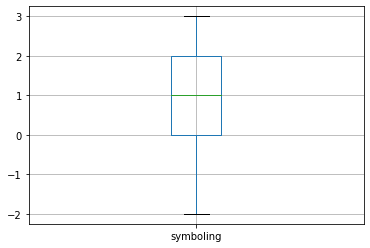

In [100]:
df[['symboling']].boxplot()

<AxesSubplot:>

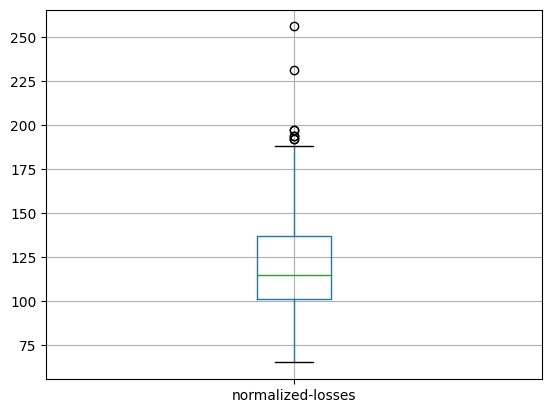

In [101]:
df[['normalized-losses']].boxplot()

q1--> 101.0
q2--> 115.0
q3--> 137.0
upper_tail--> 191.0
lower_tail--> 47.0
mean--> 120.6
115.0


<AxesSubplot:>

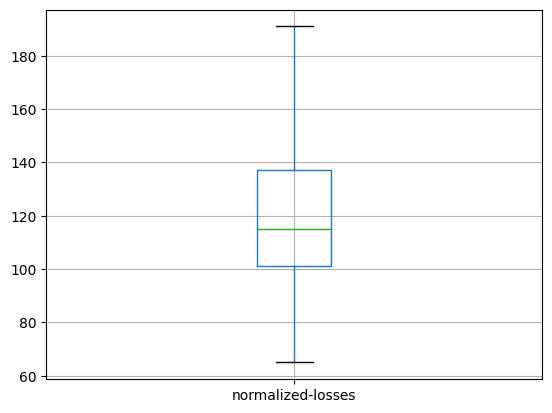

In [102]:
q1=df['normalized-losses'].quantile(0.25)
q2=df['normalized-losses'].quantile(0.50)
q3=df['normalized-losses'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['normalized-losses'].mean()))

df['normalized-losses'].median()

size_df=df[['normalized-losses']].loc[(df['normalized-losses'] < upper_tail) & 
                                   (df['normalized-losses'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['normalized-losses'] > upper_tail) |
                (df['normalized-losses'] < lower_tail), 'normalized-losses'] = upper_tail


df[['normalized-losses']].boxplot()

<AxesSubplot:>

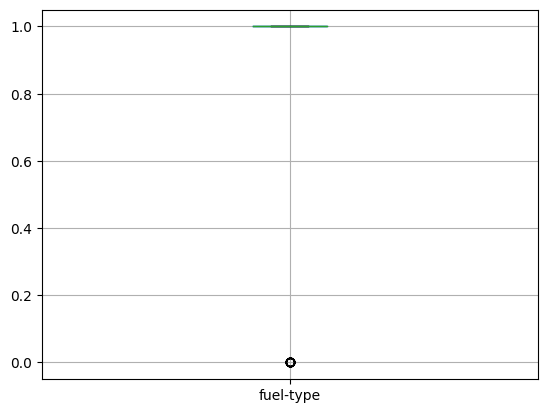

In [103]:
df[['fuel-type']].boxplot()

<AxesSubplot:>

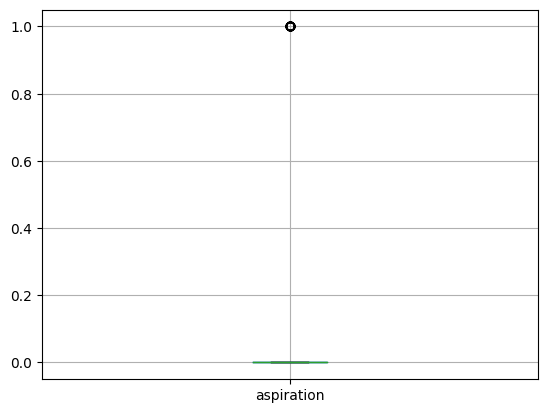

In [104]:
df[['aspiration']].boxplot()

<AxesSubplot:>

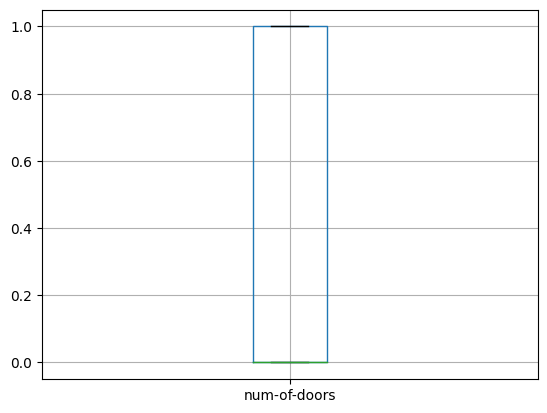

In [105]:
df[['num-of-doors']].boxplot()

<AxesSubplot:>

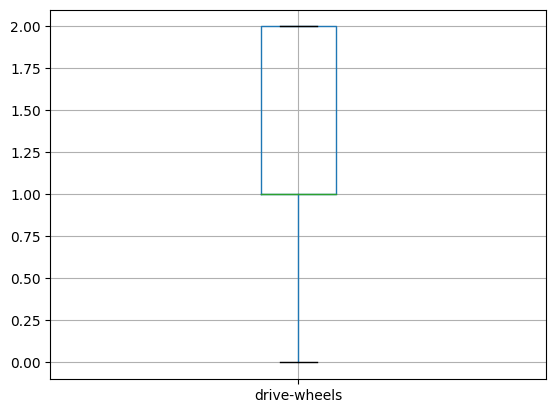

In [106]:
df[['drive-wheels']].boxplot()

<AxesSubplot:>

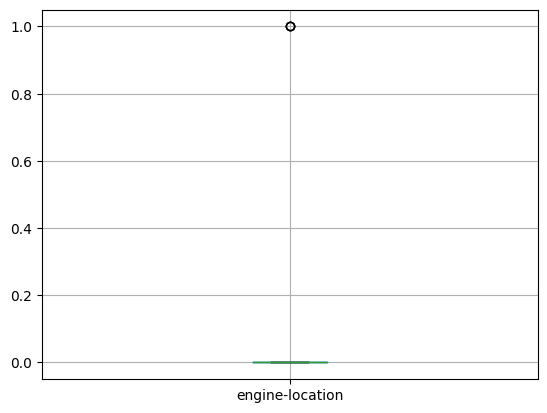

In [107]:
df[['engine-location']].boxplot()

<AxesSubplot:>

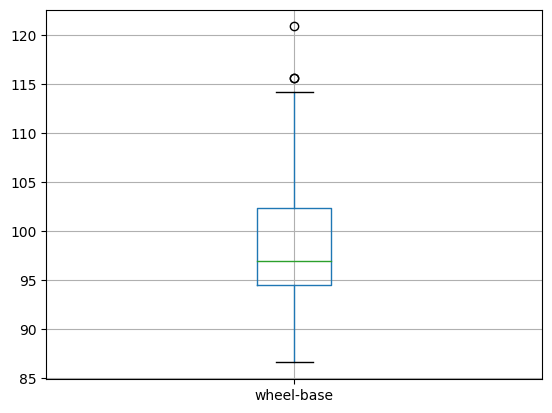

In [108]:
df[['wheel-base']].boxplot()

q1--> 94.5
q2--> 97.0
q3--> 102.4
upper_tail--> 114.25000000000001
lower_tail--> 82.64999999999999
mean--> 98.75658536585367
96.9


<AxesSubplot:>

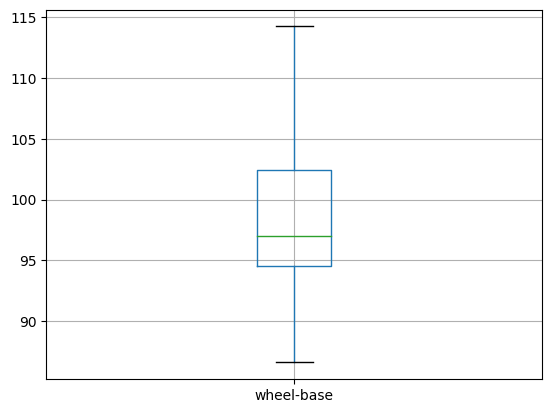

In [109]:
q1=df['wheel-base'].quantile(0.25)
q2=df['wheel-base'].quantile(0.50)
q3=df['wheel-base'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['wheel-base'].mean()))

df['wheel-base'].median()

size_df=df[['wheel-base']].loc[(df['wheel-base'] < upper_tail) & 
                                   (df['wheel-base'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['wheel-base'] > upper_tail) |
                (df['wheel-base'] < lower_tail), 'wheel-base'] = upper_tail


df[['wheel-base']].boxplot()

<AxesSubplot:>

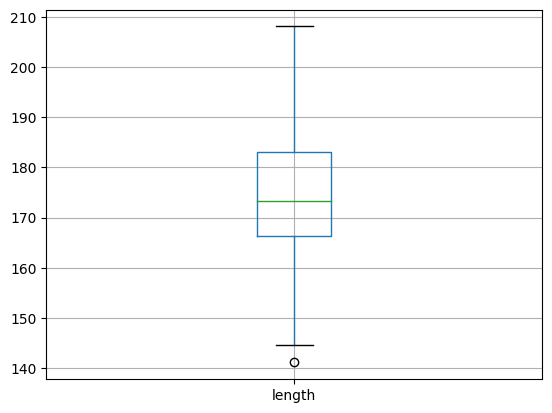

In [110]:
df[['length']].boxplot()

q1--> 166.3
q2--> 173.2
q3--> 183.1
upper_tail--> 208.29999999999995
lower_tail--> 141.10000000000002
mean--> 174.04926829268288
173.2


<AxesSubplot:>

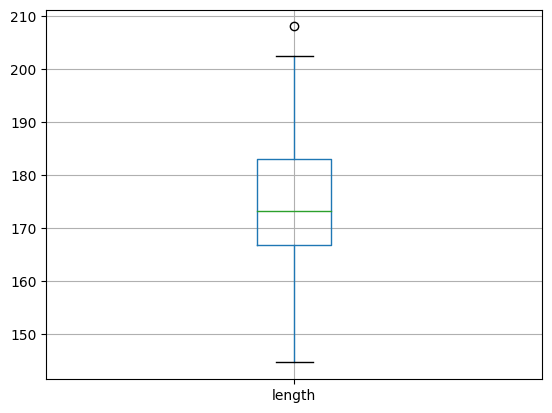

In [111]:
q1=df['length'].quantile(0.25)
q2=df['length'].quantile(0.50)
q3=df['length'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['length'].mean()))

df['length'].median()

size_df=df[['length']].loc[(df['length'] < upper_tail) & 
                                   (df['length'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['length'] > upper_tail) |
                (df['length'] < lower_tail), 'length'] = size_df


df[['length']].boxplot()

<AxesSubplot:>

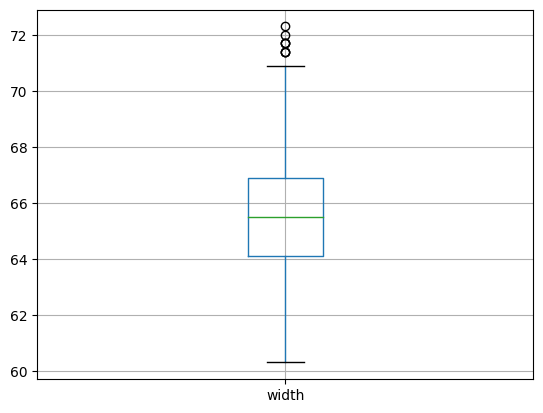

In [112]:
df[['width']].boxplot()

q1--> 64.1
q2--> 65.5
q3--> 66.9
upper_tail--> 71.10000000000002
lower_tail--> 59.89999999999998
mean--> 65.90780487804878
65.4


<AxesSubplot:>

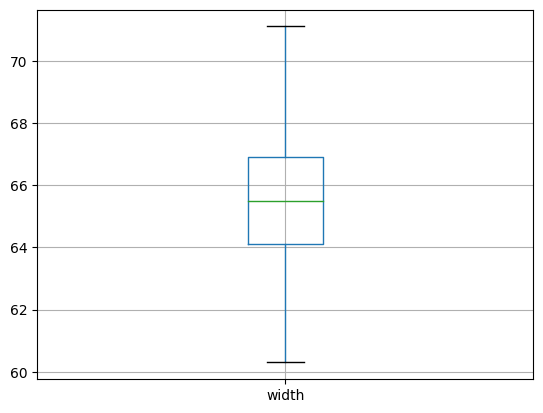

In [113]:
q1=df['width'].quantile(0.25)
q2=df['width'].quantile(0.50)
q3=df['width'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['width'].mean()))

df['width'].median()

size_df=df[['width']].loc[(df['width'] < upper_tail) & 
                                   (df['width'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['width'] > upper_tail) |
                (df['width'] < lower_tail), 'width'] = upper_tail


df[['width']].boxplot()

<AxesSubplot:>

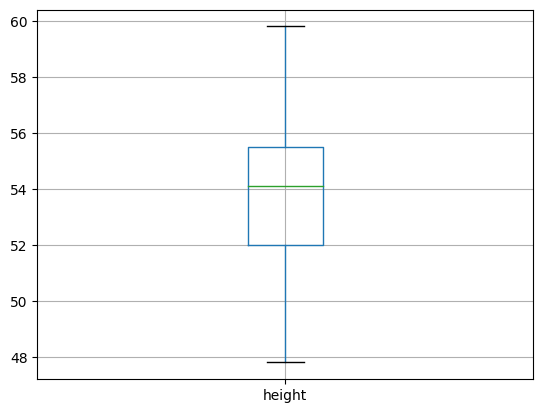

In [114]:
df[['height']].boxplot()

<AxesSubplot:>

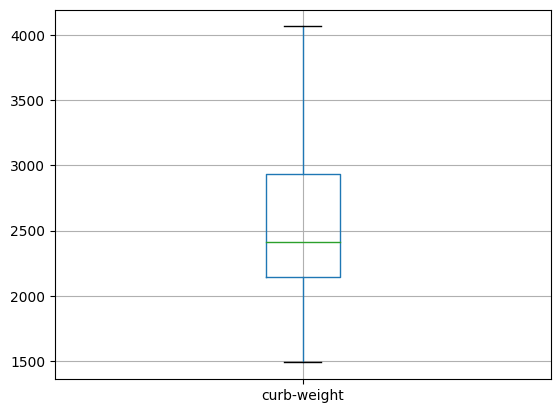

In [115]:
df[['curb-weight']].boxplot()

<AxesSubplot:>

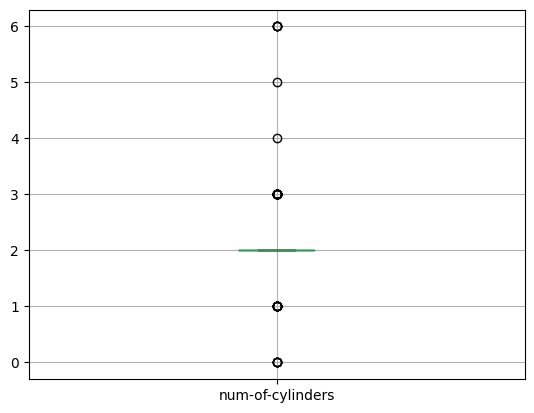

In [116]:
df[['num-of-cylinders']].boxplot()

<AxesSubplot:>

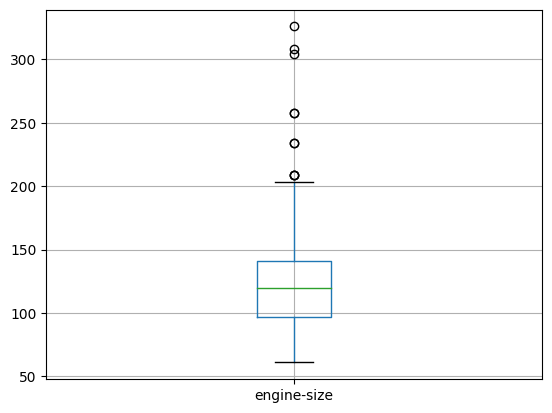

In [117]:
df[['engine-size']].boxplot()

q1--> 97.0
q2--> 120.0
q3--> 141.0
upper_tail--> 207.0
lower_tail--> 31.0
mean--> 126.90731707317073
110.0


<AxesSubplot:>

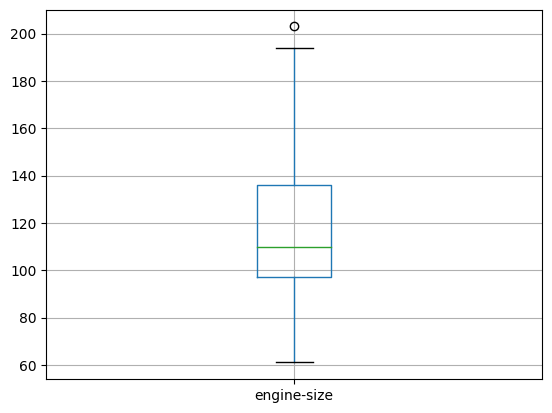

In [118]:
q1=df['engine-size'].quantile(0.25)
q2=df['engine-size'].quantile(0.50)
q3=df['engine-size'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['engine-size'].mean()))

df['engine-size'].median()

size_df=df[['engine-size']].loc[(df['engine-size'] < upper_tail) & 
                                   (df['engine-size'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['engine-size'] > upper_tail) |
                (df['engine-size'] < lower_tail), 'engine-size'] = size_df


df[['engine-size']].boxplot()

<AxesSubplot:>

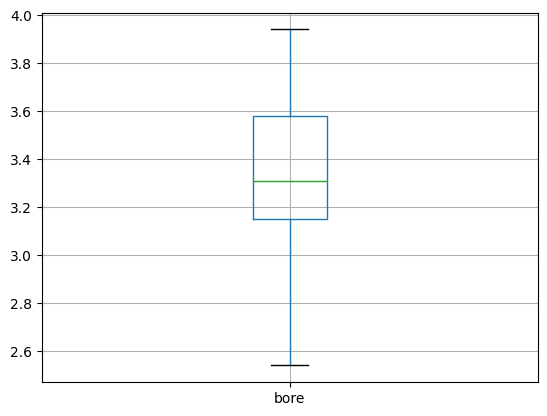

In [119]:
df[['bore']].boxplot()

<AxesSubplot:>

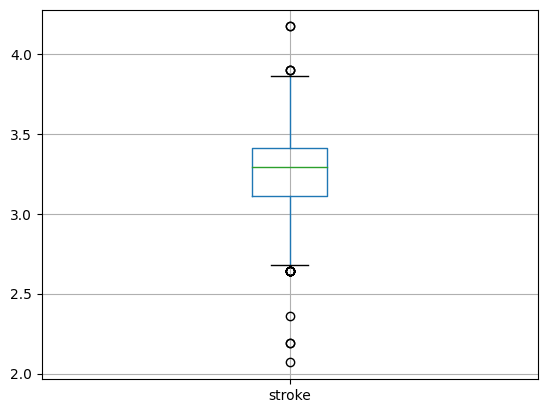

In [120]:
df[['stroke']].boxplot()

q1--> 3.11
q2--> 3.29
q3--> 3.41
upper_tail--> 3.8600000000000003
lower_tail--> 2.6599999999999993
mean--> 3.2560975609756095
3.29


<AxesSubplot:>

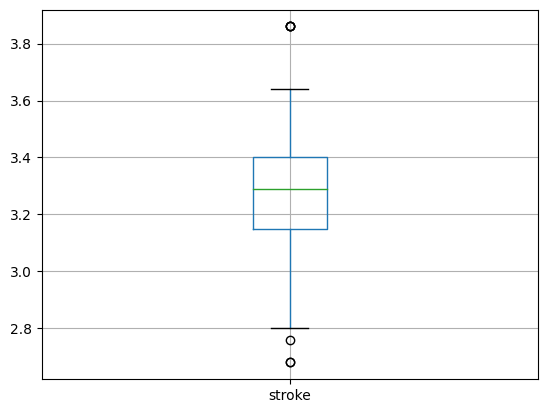

In [121]:
q1=df['stroke'].quantile(0.25)
q2=df['stroke'].quantile(0.50)
q3=df['stroke'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['stroke'].mean()))

df['stroke'].median()

size_df=df[['stroke']].loc[(df['stroke'] < upper_tail) & 
                                   (df['stroke'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['stroke'] > upper_tail) |
                (df['stroke'] < lower_tail), 'stroke'] = size_df


df[['stroke']].boxplot()

<AxesSubplot:xlabel='stroke'>

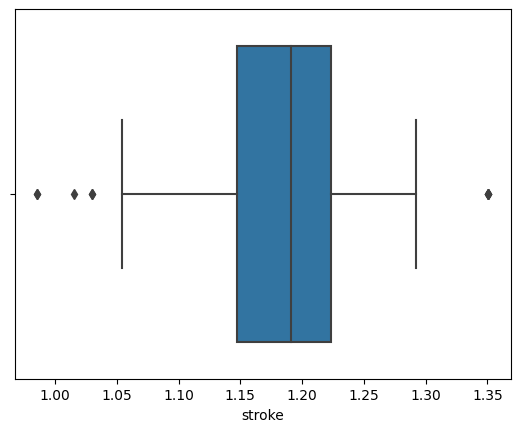

In [122]:
sns.boxplot(x=np.log(df['stroke']))

<AxesSubplot:>

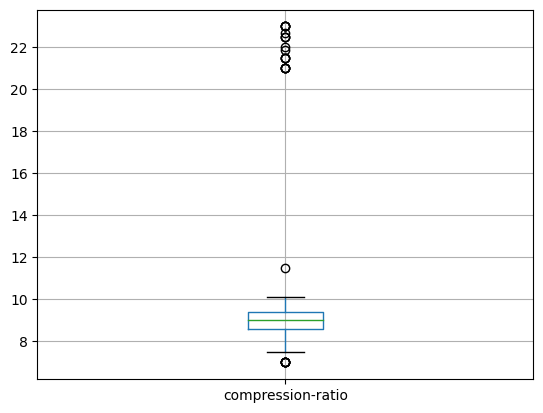

In [123]:
df[['compression-ratio']].boxplot()

q1--> 8.6
q2--> 9.0
q3--> 9.4
upper_tail--> 10.600000000000001
lower_tail--> 7.399999999999999
mean--> 10.142536585365855
9.0


<AxesSubplot:>

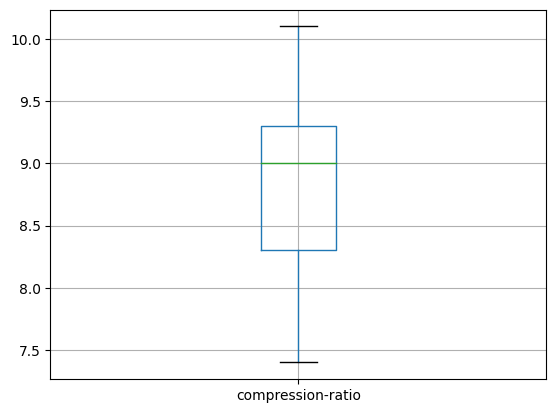

In [124]:
q1=df['compression-ratio'].quantile(0.25)
q2=df['compression-ratio'].quantile(0.50)
q3=df['compression-ratio'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['compression-ratio'].mean()))

df['compression-ratio'].median()

size_df=df[['compression-ratio']].loc[(df['compression-ratio'] < upper_tail) & 
                                   (df['compression-ratio'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['compression-ratio'] > upper_tail) |
                (df['compression-ratio'] < lower_tail), 'compression-ratio'] = lower_tail


df[['compression-ratio']].boxplot()

<AxesSubplot:>

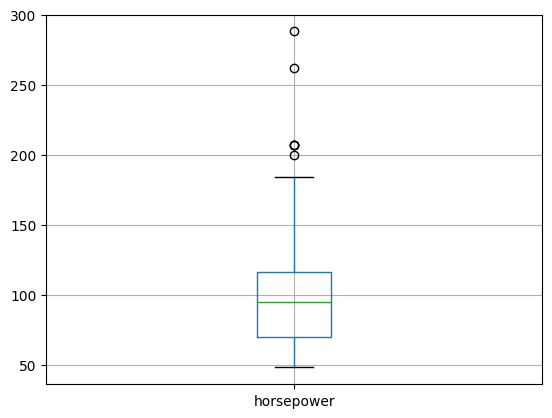

In [125]:
df[['horsepower']].boxplot()

q1--> 70.0
q2--> 95.0
q3--> 116.0
upper_tail--> 185.0
lower_tail--> 1.0
mean--> 104.16585365853659
95.0


<AxesSubplot:>

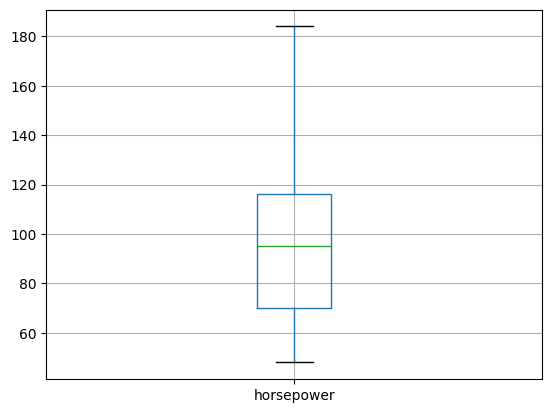

In [126]:
q1=df['horsepower'].quantile(0.25)
q2=df['horsepower'].quantile(0.50)
q3=df['horsepower'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['horsepower'].mean()))

df['horsepower'].median()

size_df=df[['horsepower']].loc[(df['horsepower'] < upper_tail) & 
                                   (df['horsepower'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['horsepower'] > upper_tail) |
                (df['horsepower'] < lower_tail), 'horsepower'] = size_df


df[['horsepower']].boxplot()

<AxesSubplot:>

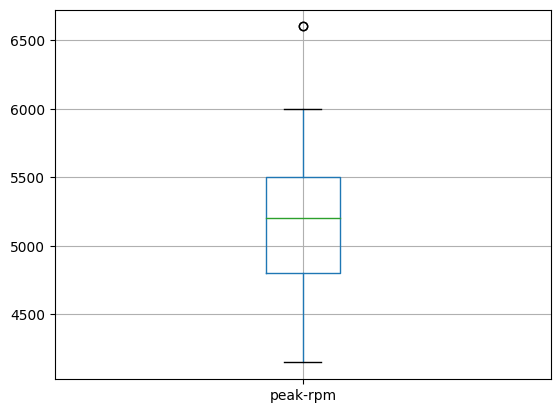

In [127]:
df[['peak-rpm']].boxplot()

q1--> 4800.0
q2--> 5200.0
q3--> 5500.0
upper_tail--> 6550.0
lower_tail--> 3750.0
mean--> 5126.09756097561
5200.0


<AxesSubplot:>

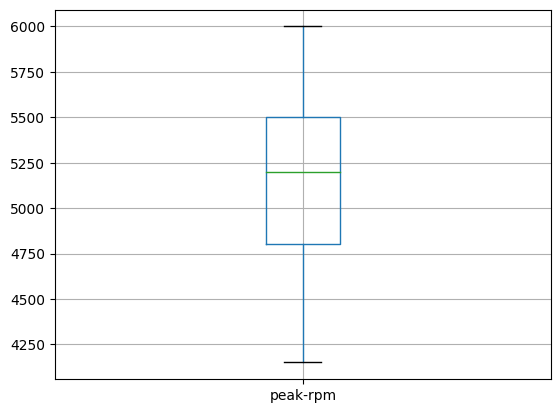

In [128]:
q1=df['peak-rpm'].quantile(0.25)
q2=df['peak-rpm'].quantile(0.50)
q3=df['peak-rpm'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['peak-rpm'].mean()))

df['peak-rpm'].median()

size_df=df[['peak-rpm']].loc[(df['peak-rpm'] < upper_tail) & 
                                   (df['peak-rpm'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['peak-rpm'] > upper_tail) |
                (df['peak-rpm'] < lower_tail), 'peak-rpm'] = size_df


df[['peak-rpm']].boxplot()

<AxesSubplot:>

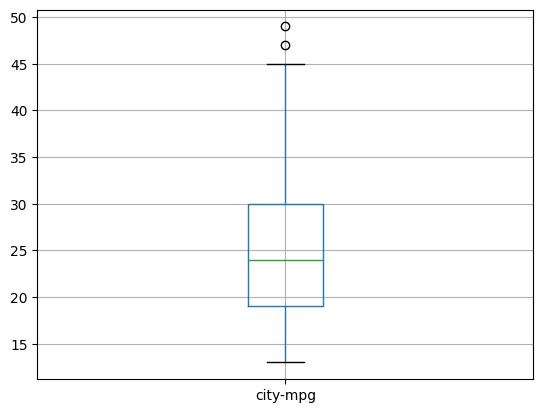

In [129]:
df[['city-mpg']].boxplot()

q1--> 19.0
q2--> 24.0
q3--> 30.0
upper_tail--> 46.5
lower_tail--> 2.5
mean--> 25.21951219512195
24.0


<AxesSubplot:>

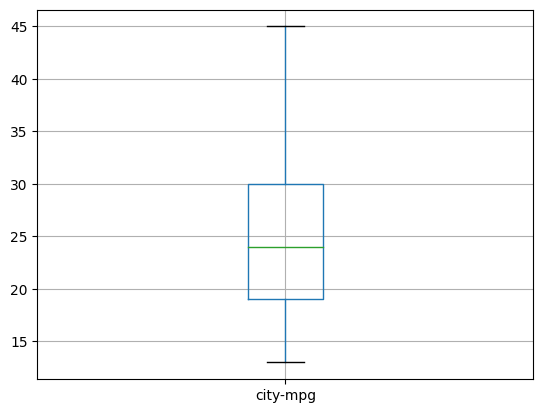

In [130]:
q1=df['city-mpg'].quantile(0.25)
q2=df['city-mpg'].quantile(0.50)
q3=df['city-mpg'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['city-mpg'].mean()))

df['city-mpg'].median()

size_df=df[['city-mpg']].loc[(df['city-mpg'] < upper_tail) & 
                                   (df['city-mpg'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['city-mpg'] > upper_tail) |
                (df['city-mpg'] < lower_tail), 'city-mpg'] = size_df


df[['city-mpg']].boxplot()

<AxesSubplot:>

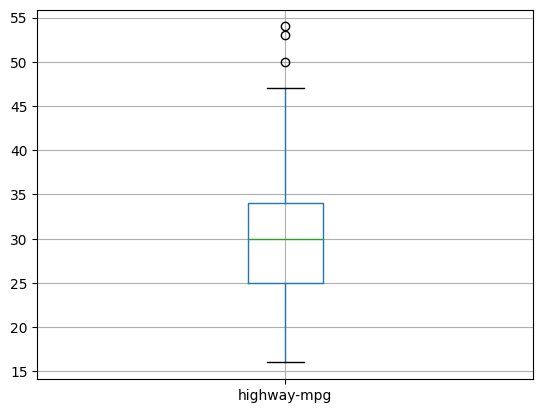

In [131]:
df[['highway-mpg']].boxplot()

q1--> 25.0
q2--> 30.0
q3--> 34.0
upper_tail--> 47.5
lower_tail--> 11.5
mean--> 30.75121951219512
30.0


<AxesSubplot:>

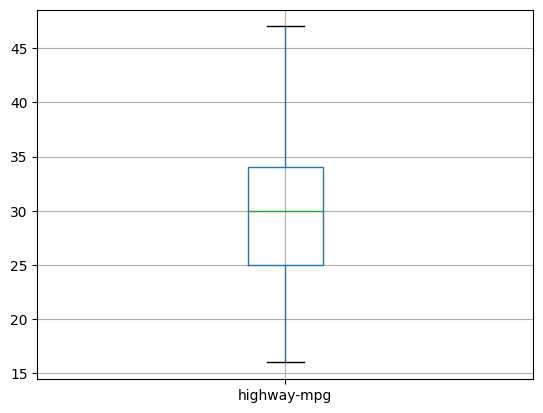

In [132]:
q1=df['highway-mpg'].quantile(0.25)
q2=df['highway-mpg'].quantile(0.50)
q3=df['highway-mpg'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['highway-mpg'].mean()))

df['highway-mpg'].median()

size_df=df[['highway-mpg']].loc[(df['highway-mpg'] < upper_tail) & 
                                   (df['highway-mpg'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['highway-mpg'] > upper_tail) |
                (df['highway-mpg'] < lower_tail), 'highway-mpg'] = size_df


df[['highway-mpg']].boxplot()

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int32  
 3   aspiration              205 non-null    int32  
 4   num-of-doors            205 non-null    int32  
 5   drive-wheels            205 non-null    int32  
 6   engine-location         205 non-null    int32  
 7   wheel-base              205 non-null    float64
 8   length                  205 non-null    float64
 9   width                   205 non-null    float64
 10  height                  205 non-null    float64
 11  curb-weight             205 non-null    int64  
 12  num-of-cylinders        205 non-null    int32  
 13  engine-size             205 non-null    int64  
 14  bore                    205 non-null    fl

# Feature Selection

In [134]:
df.corr()

symboling  normalized-losses  fuel-type  aspiration  \
symboling           1.000000           0.461559   0.194311   -0.059866   
normalized-losses   0.461559           1.000000   0.104505   -0.003670   
fuel-type           0.194311           0.104505   1.000000   -0.401397   
aspiration         -0.059866          -0.003670  -0.401397    1.000000   
num-of-doors        0.663595           0.347699   0.188496   -0.052803   
...                      ...                ...        ...         ...   
fuel-system_idi    -0.194311          -0.104505  -1.000000    0.401397   
fuel-system_mfi     0.122067           0.058644   0.023020    0.149190   
fuel-system_mpfi    0.012532           0.168499   0.302574   -0.050041   
fuel-system_spdi    0.181939           0.059876   0.070457    0.394703   
fuel-system_spfi    0.065707          -0.011701   0.023020   -0.032857   

                   num-of-doors  drive-wheels  engine-location  wheel-base  \
symboling              0.663595     -0.041671         0.212471   -0.537515   
normalized-losses      0.347699      0.299660        -0.020367   -0.071115   
fuel-type              0.188496     -0.132257         0.040070   -0.314415   
aspiration            -0.052803      0.066465        -0.057191    0.264436   
num-of-doors           1.000000      0.104877         0.139129   -0.443229   
...                         ...           ...              ...         ...   
fuel-system_idi       -0.188496      0.132257        -0.040070    0.314415   
fuel-system_mfi        0.079932     -0.041244        -0.008532   -0.033538   
fuel-system_mpfi      -0.035746      0.393102         0.132429    0.350953   
fuel-system_spdi       0.148565     -0.083317        -0.026114   -0.118470   
fuel-system_spfi       0.079932      0.084950        -0.008532   -0.032345   

                     length     width  ...  engine-type_ohcv  \
symboling         -0.351903 -0.235697  ...         -0.013597   
normalized-losses -0.003365  0.065801  ...          0.113376   
fuel-type         -0.212254 -0.239809  ...          0.085556   
aspiration         0.232689  0.309321  ...         -0.070070   
num-of-doors      -0.377841 -0.203705  ...          0.054764   
...                     ...       ...  ...               ...   
fuel-system_idi    0.212254  0.239809  ...         -0.085556   
fuel-system_mfi   -0.005825  0.014003  ...         -0.018218   
fuel-system_mpfi   0.508674  0.466246  ...          0.282760   
fuel-system_spdi  -0.084004 -0.045367  ...         -0.055759   
fuel-system_spfi  -0.009300 -0.023059  ...         -0.018218   

                   engine-type_rotor  fuel-system_1bbl  fuel-system_2bbl  \
symboling                   0.245950         -0.037911         -0.034069   
normalized-losses           0.141783         -0.125345         -0.117611   
fuel-type                   0.046383          0.078293          0.226565   
aspiration                 -0.066203         -0.111748         -0.323378   
num-of-doors                0.161052          0.097150         -0.013769   
...                              ...               ...               ...   
fuel-system_idi            -0.046383         -0.078293         -0.226565   
fuel-system_mfi            -0.009877         -0.016672         -0.048245   
fuel-system_mpfi           -0.059039         -0.219128         -0.634114   
fuel-system_spdi           -0.030229         -0.051026         -0.147658   
fuel-system_spfi           -0.009877         -0.016672         -0.048245   

                   fuel-system_4bbl  fuel-system_idi  fuel-system_mfi  \
symboling                  0.212471        -0.194311         0.122067   
normalized-losses          0.122483        -0.104505         0.058644   
fuel-type                  0.040070        -1.000000         0.023020   
aspiration                -0.057191         0.401397         0.149190   
num-of-doors               0.139129        -0.188496         0.079932   
...                             ...              ...              ...   


<AxesSubplot:>

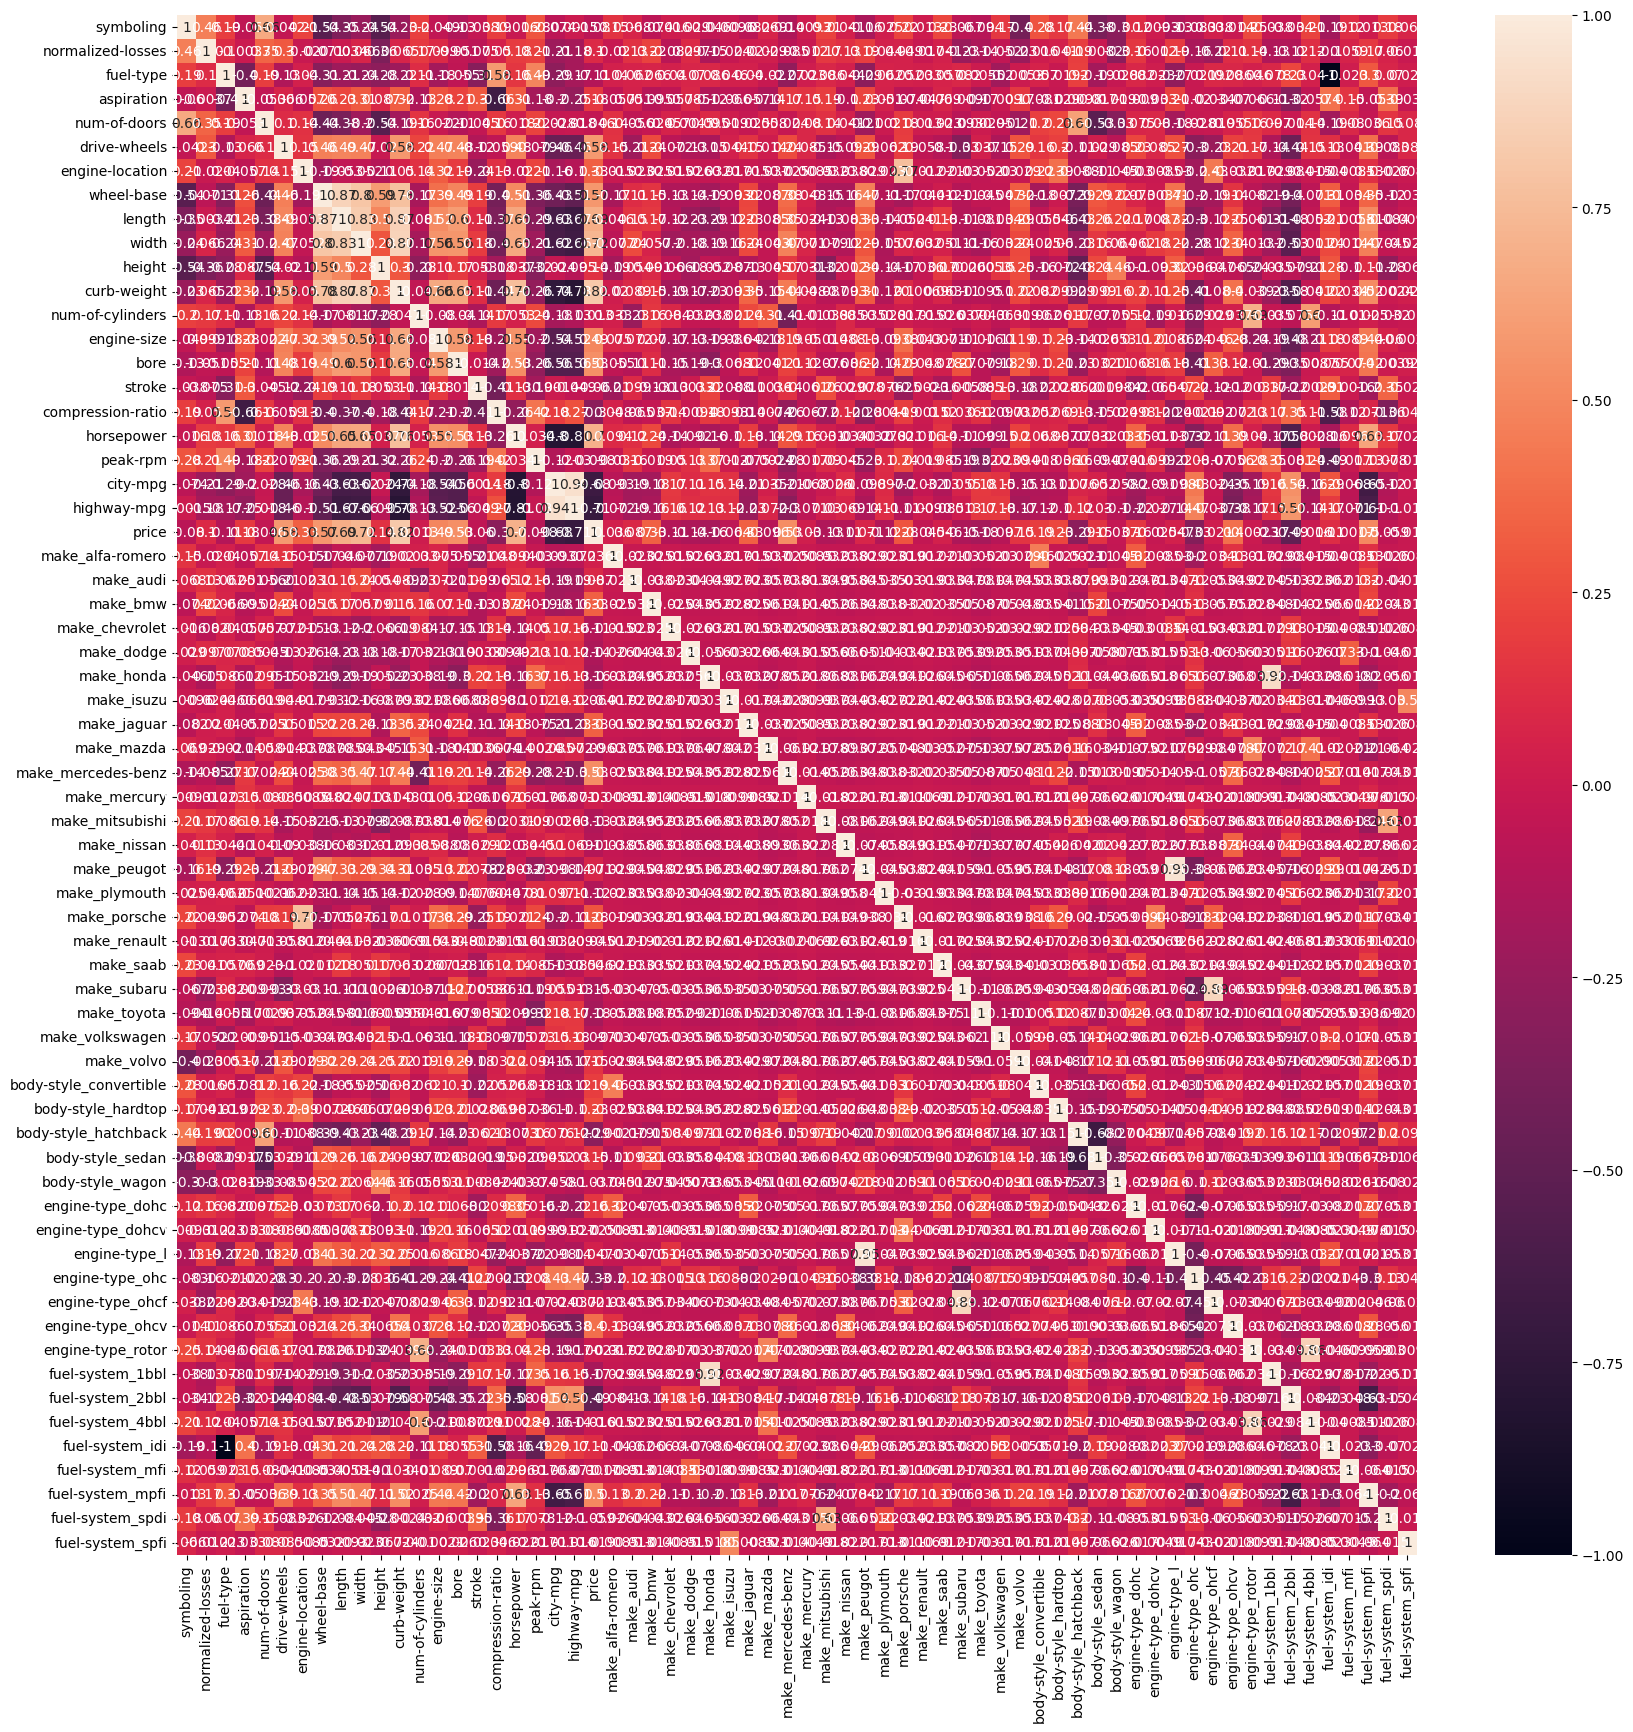

In [135]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot = True)

# Feature Selection

<AxesSubplot:>

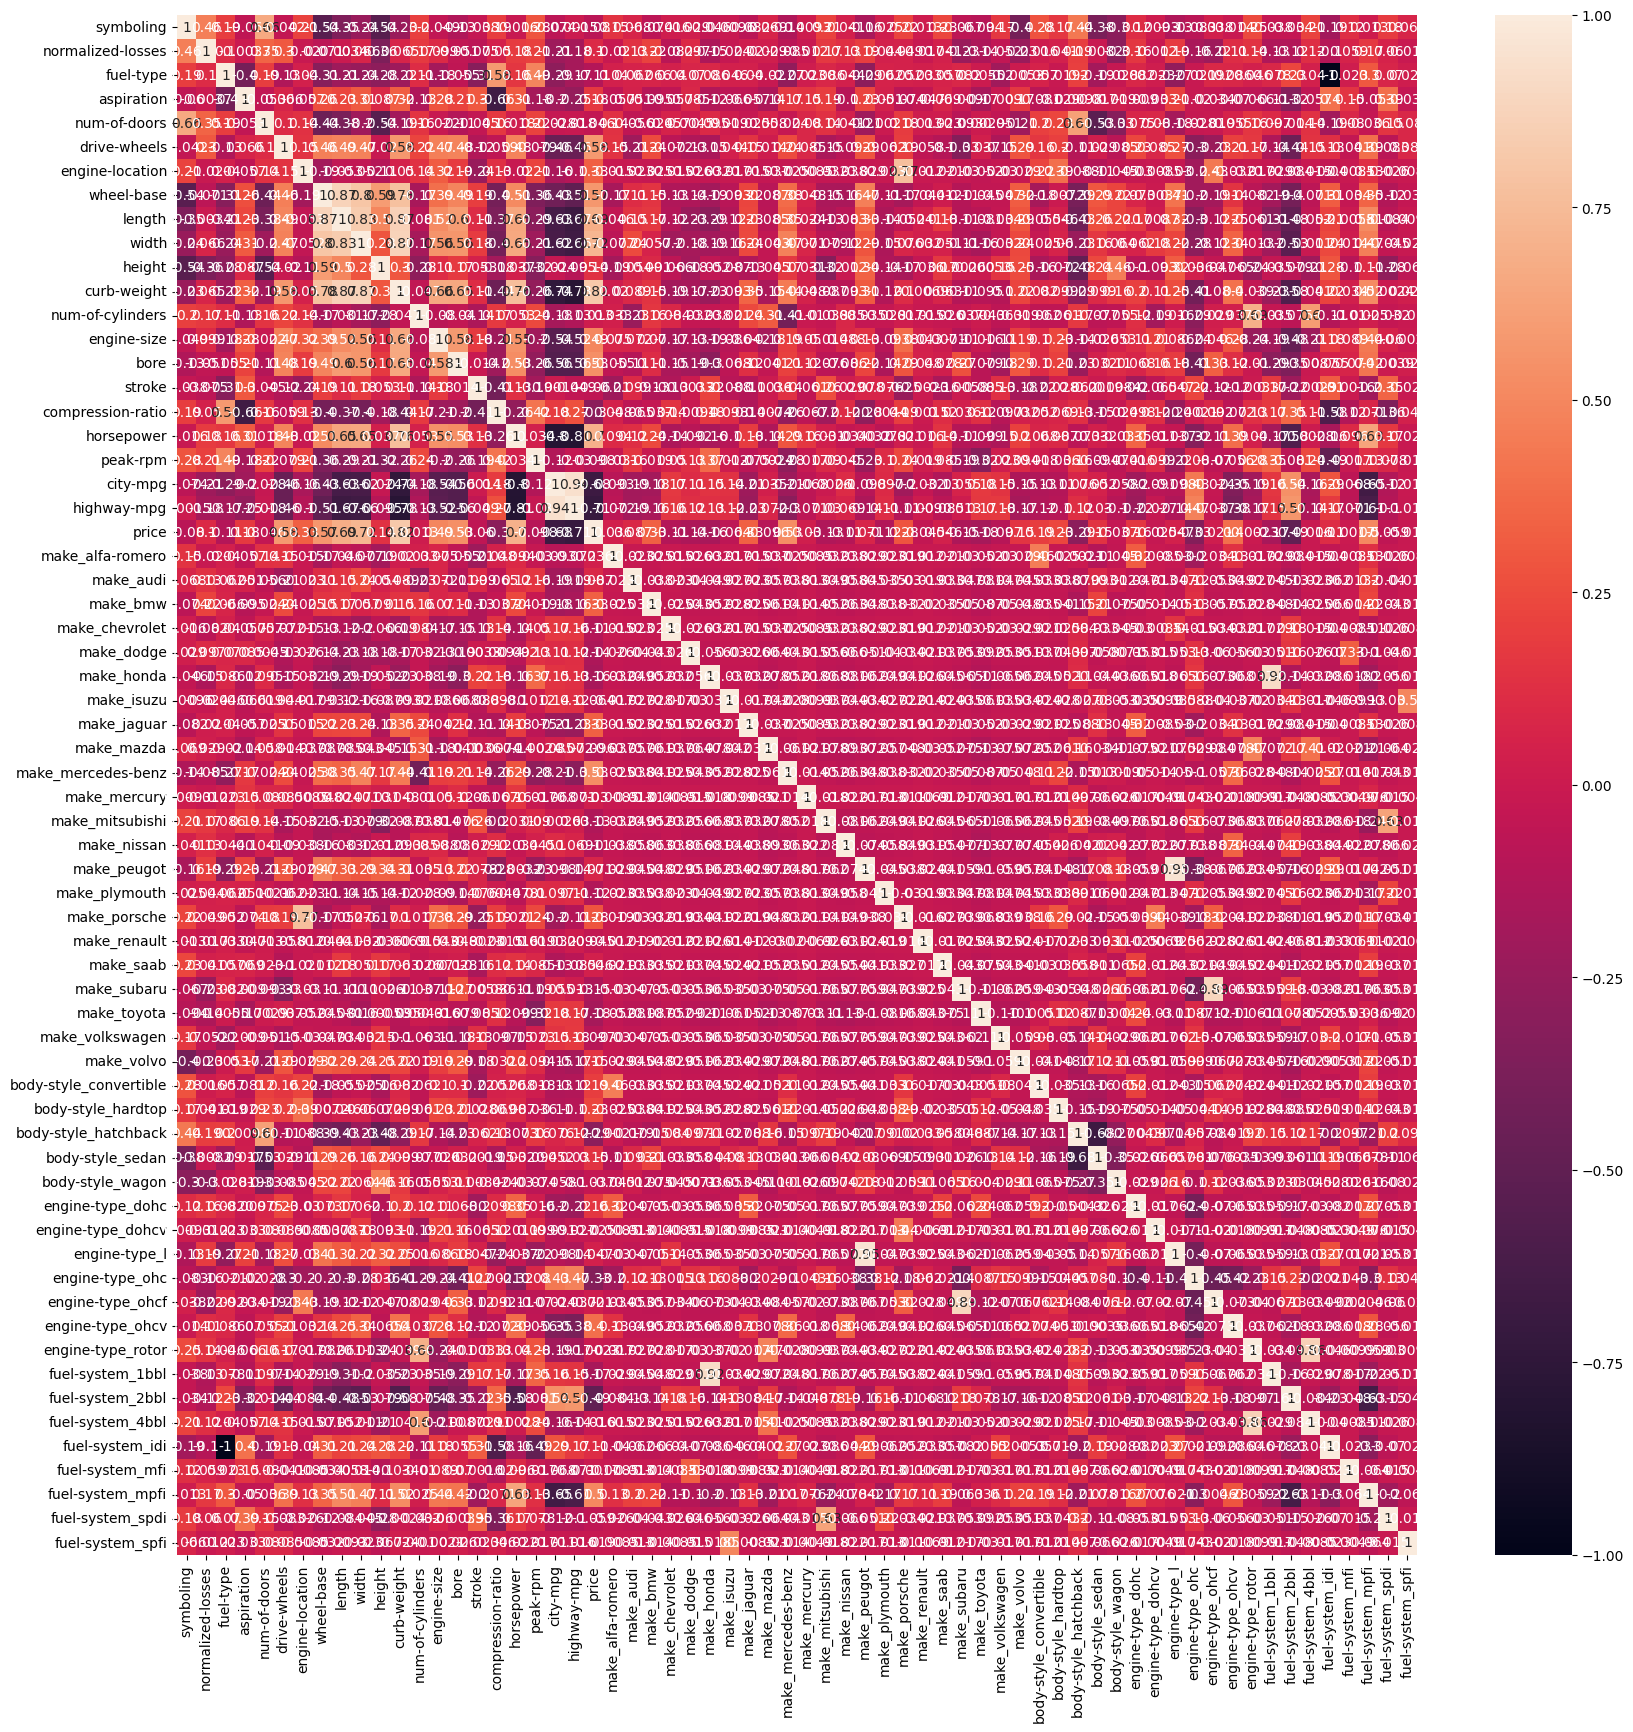

In [136]:


df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot = True)



# Model Training

In [137]:
x = df.drop('price',axis = 1)
y = df['price']

In [138]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=45)

In [139]:
x_train

symboling  normalized-losses  fuel-type  aspiration  num-of-doors  \
104          3                191          1           0             1   
171          2                134          1           0             1   
187          2                 94          0           1             0   
143          0                102          1           0             0   
180         -1                 90          1           0             0   
..         ...                ...        ...         ...           ...   
32           1                101          1           0             1   
124          3                115          1           1             1   
131          2                115          1           0             1   
158          0                 91          0           0             0   
203         -1                 95          0           1             0   

     drive-wheels  engine-location  wheel-base  length  width  ...  \
104             2                0        91.3   170.7   67.9  ...   
171             2                0        98.4   176.2   65.6  ...   
187             1                0        97.3   171.7   65.5  ...   
143             1                0        97.2   172.0   65.4  ...   
180             2                0       104.5   187.8   66.5  ...   
..            ...              ...         ...     ...    ...  ...   
32              1                0        93.7   150.0   64.0  ...   
124             2                0        95.9   173.2   66.3  ...   
131             1                0        96.1   176.8   66.6  ...   
158             1                0        95.7   166.3   64.4  ...   
203             2                0       109.1   188.8   68.9  ...   

     engine-type_ohcv  engine-type_rotor  fuel-system_1bbl  fuel-system_2bbl  \
104                 1                  0                 0                 0   
171                 0                  0                 0                 0   
187                 0                  0                 0                 0   
143                 0                  0                 0                 0   
180                 0                  0                 0                 0   
..                ...                ...               ...               ...   
32                  0                  0                 1                 0   
124                 0                  0                 0                 0   
131                 0                  0                 0                 0   
158                 0                  0                 0                 0   
203                 0                  0                 0                 0   

     fuel-system_4bbl  fuel-system_idi  fuel-system_mfi  fuel-system_mpfi  \
104                 0                0                0                 1   
171                 0                0                0                 1   
187                 0                1                0                 0   
143                 0                0                0                 1   
180                 0                0                0                 1   
..                ...              ...              ...               ...   
32                  0                0                0                 0   
124                 0                0                0                 0   
131                 0                0                0                 1   
158                 0                1                0                 0   
203                 0                1                0                 0   

     fuel-system_spdi  fuel-system_spfi  
104                 0                 0  
171                 0                 0  
187                 0                 0  
143                 0                 0  
180                 0                 0  
..                ...               ...  
32                  0                 0  
124                 1                 0  
131        

In [140]:
auto_model = LinearRegression()
auto_model.fit(x_train,y_train)

LinearRegression()

# Metric Evalution

## testing data

In [141]:
y_test_pred = auto_model.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("mse-->",mse)

rmse = np.sqrt(mse)
print("rmse-->",rmse)

mae = mean_absolute_error(y_test,y_test_pred)
print("mae-->",mae)

r2 = r2_score(y_test,y_test_pred)
print('r2_score-->',r2)


mse--> 6895687.659667205
rmse--> 2625.9641390672505
mae--> 1943.8023611734716
r2_score--> 0.8695763316176198


## Training data

In [142]:
y_test_pred = auto_model.predict(x_train)

mse = mean_squared_error(y_train,y_test_pred)
print("mse-->",mse)

rmse = np.sqrt(mse)
print("rmse-->",rmse)

mae = mean_absolute_error(y_train,y_test_pred)
print("mae-->",mae)

r2 = r2_score(y_train,y_test_pred)
print('r2_score-->',r2)

mse--> 1899159.7175882244
rmse--> 1378.100039034984
mae--> 964.7537771205808
r2_score--> 0.9706838532747124


# Training on single row

In [143]:
x.head(1).T

0
symboling            3.0
normalized-losses  115.0
fuel-type            1.0
aspiration           0.0
num-of-doors         1.0
...                  ...
fuel-system_idi      0.0
fuel-system_mfi      0.0
fuel-system_mpfi     1.0
fuel-system_spdi     0.0
fuel-system_spfi     0.0

[63 rows x 1 columns]

In [144]:
x.head(1).T.shape

(63, 1)

In [145]:
columns = x.columns
print(columns)

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'drive-wheels', 'engine-location', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'make_alfa-romero', 'make_audi',
       'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'engine-type_dohc',
       'engine-type_dohcv', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor',
       'f

In [146]:
len(columns)

63

In [147]:
fuel_type_value = {'gas': 1, 'diesel': 0}
aspiration_value = {'std': 0, 'turbo': 1}
num_doors_value = {'four': 0, 'two': 1}
drive_wheels_value = {'fwd': 1, 'rwd': 2, '4wd': 0}
engine_loc_value = {'front':0, "rear":1}
num_cyli_value = {'four': 2,'six': 3,'five': 1,'eight': 0,'two': 6,'three': 4,'twelve': 5}

In [148]:
# user intput
symboling = 3.0
normalized_losses = 115.0
fuel_type = 'gas'
aspiration= 'turbo'
num_of_doors= 'two'
drive_wheels= '4wd'
engine_location= 'front'
wheel_base=88.60
length=168.80
width=64.10
height=48.80
curb_weight=2548.00
num_of_cylinders= 'two'
engine_size=130.00
bore=3.47
stroke=2.68
compression_ratio=9.00
horsepower=111.00
peak_rpm=5000.00
city_mpg=21.00
highway_mpg=27.00

# one hot encoded 
make = "audi"
body_style = "convertible"
engine_type = "dohc"
fuel_system = "spfi"

In [149]:

make_col = "make_" + make
body_style_col = "body-style_" + body_style 
engine_type_col = "engine-type_" + engine_type
fuel_system_col = "fuel-system_" + fuel_system

print(make_col)
print(body_style_col)
print(engine_type_col)
print(fuel_system_col)

make_audi
body-style_convertible
engine-type_dohc
fuel-system_spfi


In [150]:
columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'drive-wheels', 'engine-location', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'make_alfa-romero', 'make_audi',
       'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'engine-type_dohc',
       'engine-type_dohcv', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor',
       'f

In [153]:
make_index = np.where (columns == make_col)[0][0]
body_style_index = np.where(columns == body_style_col)[0][0]
engine_type_index = np.where(columns == engine_type_col)[0][0]
fuel_system_index = np.where(columns == fuel_system_col)[0][0]

print(make_index)
print(body_style_index)
print(engine_type_index)
print(fuel_system_index)

22
43
48
62


In [155]:
array = np.zeros(columns.shape[0],dtype = int)
array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [157]:
len(columns)

63

In [159]:
array = np.zeros(columns.shape[0],dtype = int)
array[0] = symboling
array[1] = normalized_losses
array[2] = fuel_type_value[fuel_type]
array[3] = aspiration_value[aspiration]
array[4] = num_doors_value[num_of_doors]
array[5] = drive_wheels_value[drive_wheels]
array[6] = engine_loc_value[engine_location]
array[7] = wheel_base
array[8] = length
array[9] = width
array[10] = height
array[11] = curb_weight
array[12] = num_cyli_value[num_of_cylinders]
array[13] = engine_size
array[14] = bore
array[15] = stroke
array[16] = compression_ratio
array[17] = horsepower
array[18] = peak_rpm
array[19] = city_mpg
array[20] = highway_mpg


array[body_style_index] = 1
array[engine_type_index] = 1
array[fuel_system_index] = 1
array[make_index] = 1

array

array([   3,  115,    1,    1,    1,    0,    0,   88,  168,   64,   48,
       2548,    6,  130,    3,    2,    9,  111, 5000,   21,   27,    0,
          1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
          0,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    1])

In [160]:
predicted_price = auto_model.predict([array])[0]
print(f"Predicted price of car is {np.around(predicted_price,2)} -/ Rs Only")

Predicted price of car is 13540.09 -/ Rs Only


In [162]:
# store all this column is json 
json_auto_data  = {"fuel_type_value":fuel_type_value,"aspiration_value":aspiration_value,
                       "num_doors_value":num_doors_value,"drive_wheels_value":drive_wheels_value,
                       "engine_loc_value":engine_loc_value,"num_cyli_value":num_cyli_value,
                      "columns":list(columns)}
json_auto_data
json_auto_data["columns"].index(body_style_col)

43

In [164]:
json_auto_data = {'fuel_type_value': {'gas': 1, 'diesel': 0},
 'aspiration_value': {'std': 0, 'turbo': 1},
 'num_doors_value': {'four': 0, 'two': 1},
 'drive_wheels_value': {'fwd': 1, 'rwd': 2, '4wd': 0},
 'engine_loc_value': {'front': 0, 'rear': 1},
 'num_cyli_value': {'four': 2,
  'six': 3,
  'five': 1,
  'eight': 0,
  'two': 6,
  'three': 4,
  'twelve': 5},
 'columns': ['symboling',
  'normalized-losses',
  'fuel-type',
  'aspiration',
  'num-of-doors',
  'drive-wheels',
  'engine-location',
  'wheel-base',
  'length',
  'width',
  'height',
  'curb-weight',
  'num-of-cylinders',
  'engine-size',
  'bore',
  'stroke',
  'compression-ratio',
  'horsepower',
  'peak-rpm',
  'city-mpg',
  'highway-mpg',
  'make_alfa-romero',
  'make_audi',
  'make_bmw',
  'make_chevrolet',
  'make_dodge',
  'make_honda',
  'make_isuzu',
  'make_jaguar',
  'make_mazda',
  'make_mercedes-benz',
  'make_mercury',
  'make_mitsubishi',
  'make_nissan',
  'make_peugot',
  'make_plymouth',
  'make_porsche',
  'make_renault',
  'make_saab',
  'make_subaru',
  'make_toyota',
  'make_volkswagen',
  'make_volvo',
  'body-style_convertible',
  'body-style_hardtop',
  'body-style_hatchback',
  'body-style_sedan',
  'body-style_wagon',
  'engine-type_dohc',
  'engine-type_dohcv',
  'engine-type_l',
  'engine-type_ohc',
  'engine-type_ohcf',
  'engine-type_ohcv',
  'engine-type_rotor',
  'fuel-system_1bbl',
  'fuel-system_2bbl',
  'fuel-system_4bbl',
  'fuel-system_idi',
  'fuel-system_mfi',
  'fuel-system_mpfi','fuel-system_spdi','fuel-system_spfi']}
json_auto_data["columns"].index(make_col)

22

In [165]:
len(json_auto_data["columns"])

63

In [166]:
# make = "make_audi"
json_auto_data["columns"].index(make_col)

22

In [167]:
import json

with open("json_auto_data.json", "w") as f:
    json.dump(json_auto_data, f)

In [168]:
# Save Model in Pickle File
import pickle

with open("auto_model.pkl", "wb") as f:
    pickle.dump(auto_model, f)